In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


 ## Load and Preprocess the Dataset

In [18]:

df = pd.read_csv('enron_spam_data.csv')

# Show basic info 
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


## Preprocess Data

<class 'pandas.core.frame.DataFrame'>
Index: 33345 entries, 1 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33345 non-null  int64 
 1   Subject     33107 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33345 non-null  int64 
 4   Date        33345 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


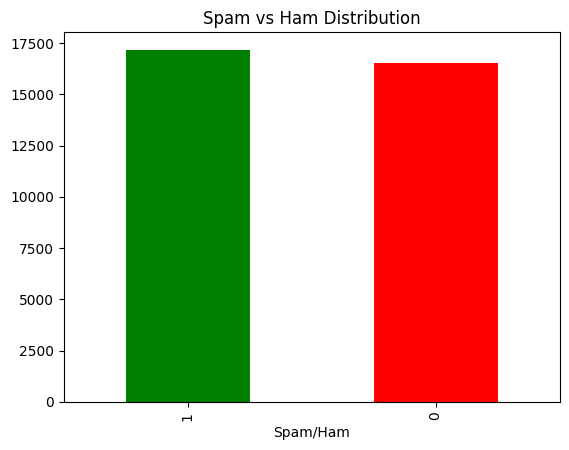

In [19]:

df['Spam/Ham'] = df['Spam/Ham'].map({'ham': 0, 'spam': 1})


df['Spam/Ham'].value_counts().plot(kind='bar', color=['green', 'red'], title="Spam vs Ham Distribution")

df = df.dropna(subset=['Message'])


df.head()
df.info()


## Split the Data into Features and Target

In [20]:

X = df['Message']
y = df['Spam/Ham']

# Split into train and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the split data
X_train.shape, X_test.shape


((26676,), (6669,))

# Create a Pipeline with TF-IDF and Logistic Regression

In [21]:

model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.9, min_df=3)),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2),
                                 stop_words='english')),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

## Metrics and Visualization

In [22]:
# Make predictions
y_pred = model.predict(X_test)

# Classification report (accuracy, precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()

# Save the confusion matrix 
confusion_matrix_path = 'confusion_matrix.png'
plt.savefig(confusion_matrix_path)
plt.close()


confusion_matrix_path


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3333
           1       0.98      1.00      0.99      3336

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669



'confusion_matrix.png'

## Save the Model

In [23]:

model_filename = 'spam_classifier.pkl'
joblib.dump(model, model_filename,protocol=4)

print(f"Model saved as {model_filename}")


Model saved as spam_classifier.pkl
